In [1]:
# Usual Imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

# Remove after push
sys.path.append('../../py/desisim')
from survey_release import SurveyRelease 
# from desisim.survey_release import SurveyRelease

%load_ext autoreload
%autoreload 2

In [2]:
# Observed data
catdir='/global/cfs/cdirs/desi/science/lya/y1-kp6/iron-tests/catalogs/'
cat_name='QSO_cat_iron_main_dark_healpix_zlya-altbal_zwarn_cut_20230918.fits'
cat_path = os.path.join(catdir,cat_name)

# Generate mock catalog

This function may be introduced intoo a for loop

After making this catalog its path should be passed to quickquasars with the `--from_catalog` flag.

Other flags like `--desi-foootprint` are allowed but not needed with this approach.

If including metal strengths by quickquasars method include a `--raw-mock <raw_mock_team>` flag.

In [3]:
# Read master catalog and prepare data catalog, takes a little bit of time if data catalg is provided.
# Y5 mocks do not need a catalog path unless you want to use Y1 distributions for magnitudes. 
# TODO: Should probably refactor the class to make it clearer what refers to data and what to mocks.
survey=SurveyRelease(mockteam='london',subversion='v9.0.0',seed=0, 
                     qso_only=True, data_file=cat_path)
# Apply redshift distribution
# Note: For Y1 mocks (and probably Y5 too) the target selection redshift distribution from Chaussidon et al. 2022 works better to match QSO targets Iron catalog.
# The option distribution='from_data' should be a better option once I finish implementing it.
survey.apply_redshift_dist(distribution='target_selection',zmin=1.8)
# Apply NPASS geometry:
survey.apply_data_geometry(release='iron') # Pass release = None for Y5 mocks.
# Assign magnitudes 
survey.assign_rband_magnitude(from_data=True) # Pass from_data = False for Y5 mocks. Unless you want to use the Y1 magnitude distributions.
# Assign exposures
survey.assign_exposures(exptime=None) # Pass exptime = 4000 for Y5 mocks.

# Write mock catalog uncomment if needed
#surveycatalog.write('/path/to/output/outputcat_name.fits')

INFO:survey_release.py:38:__init__: Obtained 3618455 objects from /global/cfs/cdirs/desi/mocks/lya_forest/london/v9.0/v9.0.0/master.fits master catalog
INFO:survey_release.py:94:prepare_data_catalog: Reading data catalog /global/cfs/cdirs/desi/science/lya/y1-kp6/iron-tests/catalogs/QSO_cat_iron_main_dark_healpix_zlya-altbal_zwarn_cut_20230918.fits
INFO:survey_release.py:96:prepare_data_catalog: Found 1529530 targets in catalog
INFO:survey_release.py:98:prepare_data_catalog: Keeping 683252 QSOs in redshift range (1.7922433614730835,3.8063743114471436) in data catalog
INFO:survey_release.py:103:prepare_data_catalog: Keeping 633576 (92.73%) QSO targets in data catalog
INFO:survey_release.py:104:prepare_data_catalog: 49676 (7.27%) non QSO targets will be excluded from data catalog
INFO:survey_release.py:157:apply_redshift_dist: Keeping 1799696 mock QSOs to match target_selection distribution
INFO:survey_release.py:171:apply_data_geometry: Keeping 857280  mock QSOs in footprint TILES
INFO:s

/global/cfs/cdirs/desicollab/users/hiramk/desi/qq_mocks/iron_metal_tuning/local_modules/desisim/doc/nb/../../py/desisim/survey_release.py:223: RuntimeWarning: invalid value encountered in true_divide
  cdf_norm=cdf/cdf[:,-1][:,None]


# Quality check on mock catalog

## Redshift distribution

Text(0.5, 0, 'Redshift')

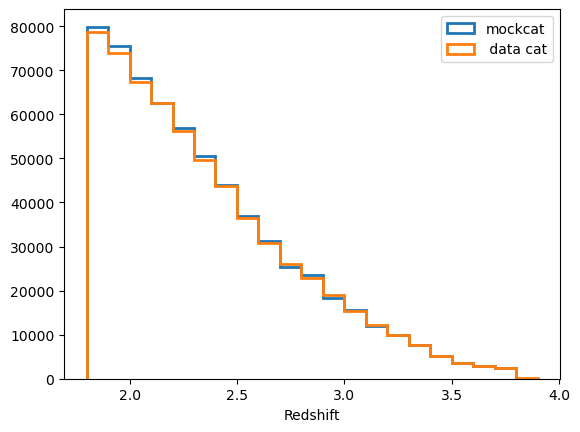

In [4]:
dndz=plt.hist(survey.mockcatalog['Z'],bins=np.arange(1.8,4,0.1),histtype='step',label='mockcat',lw=2)
plt.hist(survey.data['Z'],bins=np.arange(1.8,4,0.1),histtype='step',label=' data cat',lw=2)
plt.legend(loc='best')
plt.xlabel('Redshift')

## Magnitude distribution

Text(0.5, 0, 'r-band Magnitude')

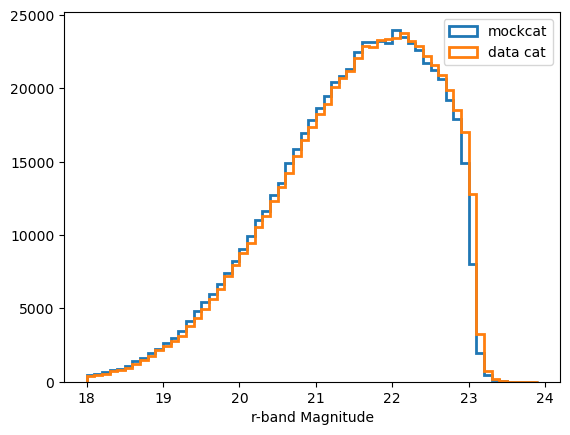

In [5]:
get_magnitude = lambda f: 22.5-2.5*np.log10(f)
plt.hist(get_magnitude(survey.mockcatalog['FLUX_R']),bins=np.arange(18,24,0.1),histtype='step',label='mockcat',lw=2)
plt.hist(get_magnitude(survey.data['FLUX_R']),bins=np.arange(18,24,0.1),histtype='step',label='data cat',lw=2)
plt.legend(loc='best')
plt.xlabel('r-band Magnitude')

## Footprint

Text(0, 0.5, 'DEC')

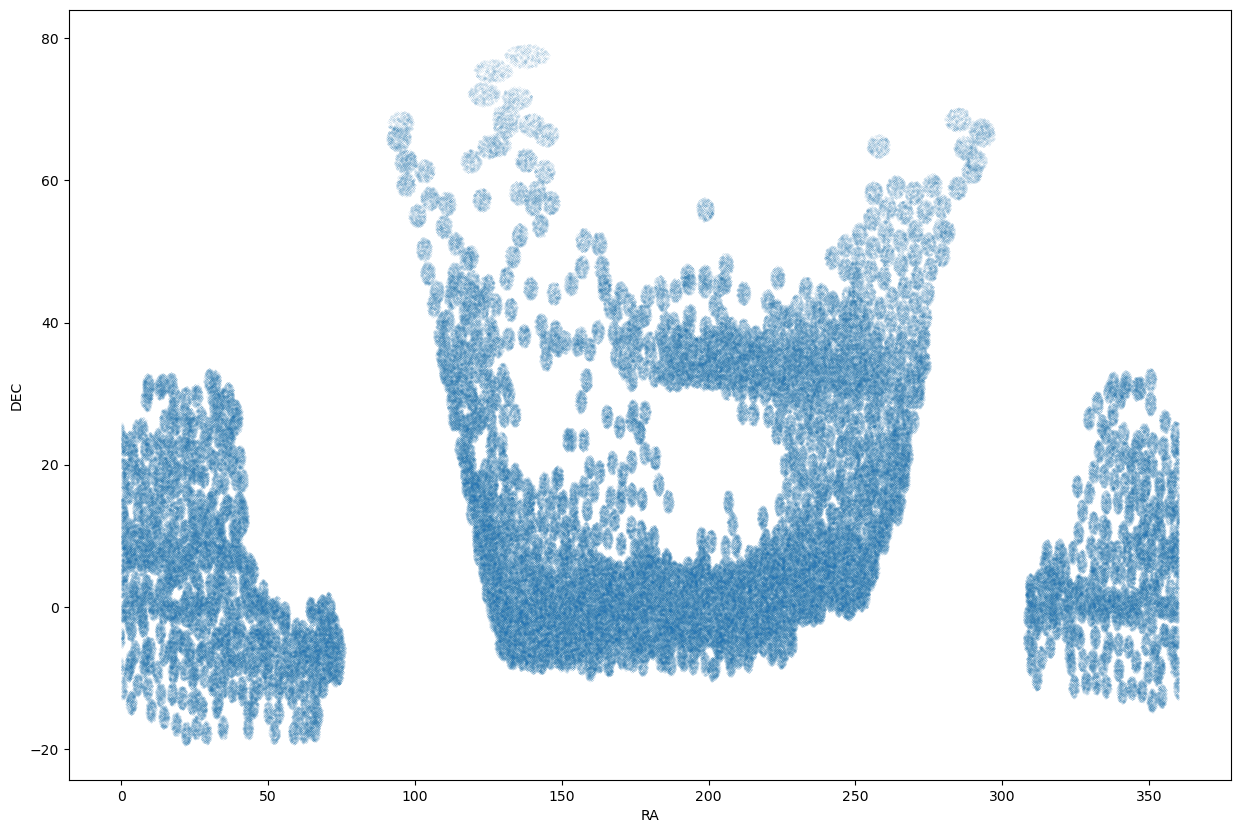

In [6]:
plt.figure(figsize=(15,10))
plt.plot(survey.mockcatalog['RA'],survey.mockcatalog['DEC'],'.',label='mockcat',ms=0.1)
plt.xlabel('RA')
plt.ylabel('DEC')

## Npasses

Text(0, 0.5, 'DEC')

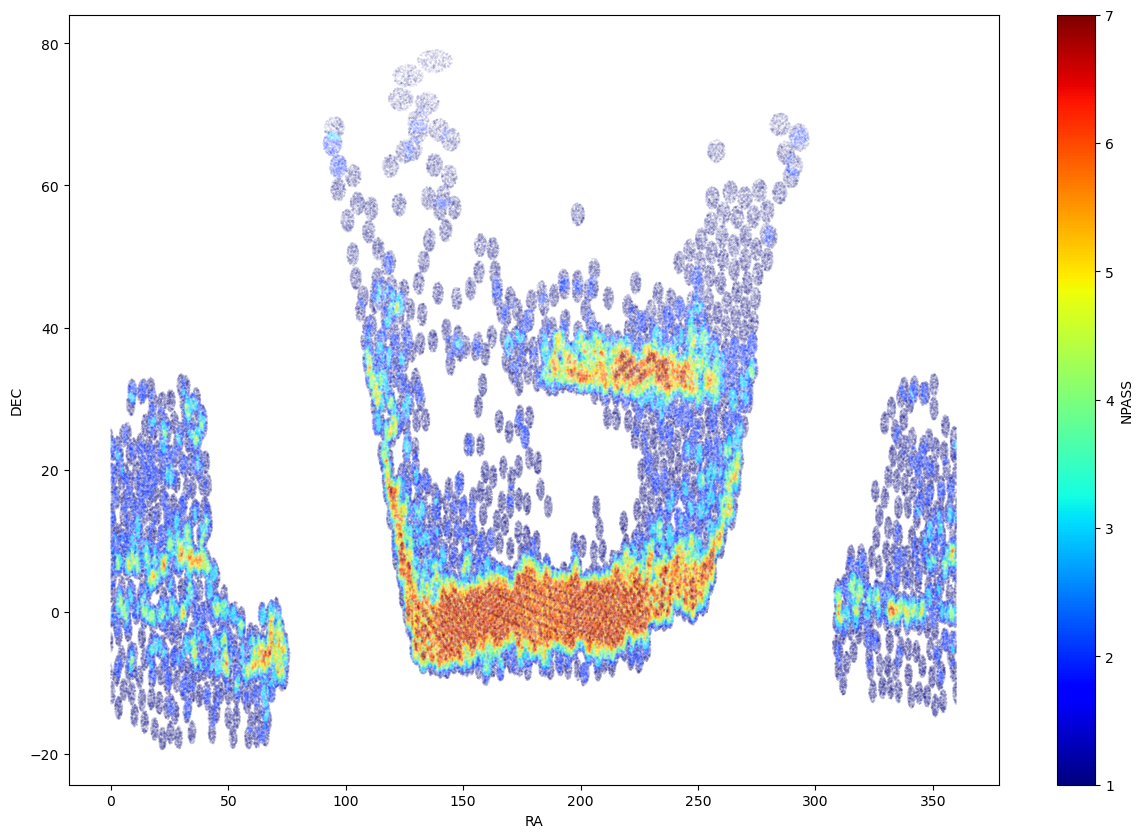

In [7]:
plt.figure(figsize=(15,10))
plt.scatter(survey.mockcatalog['RA'],survey.mockcatalog['DEC'],c=survey.mockcatalog['NPASS'],s=0.001,cmap='jet')
plt.colorbar(label='NPASS')
plt.xlabel('RA')
plt.ylabel('DEC')

## Exposure time

Text(0, 0.5, 'DEC')

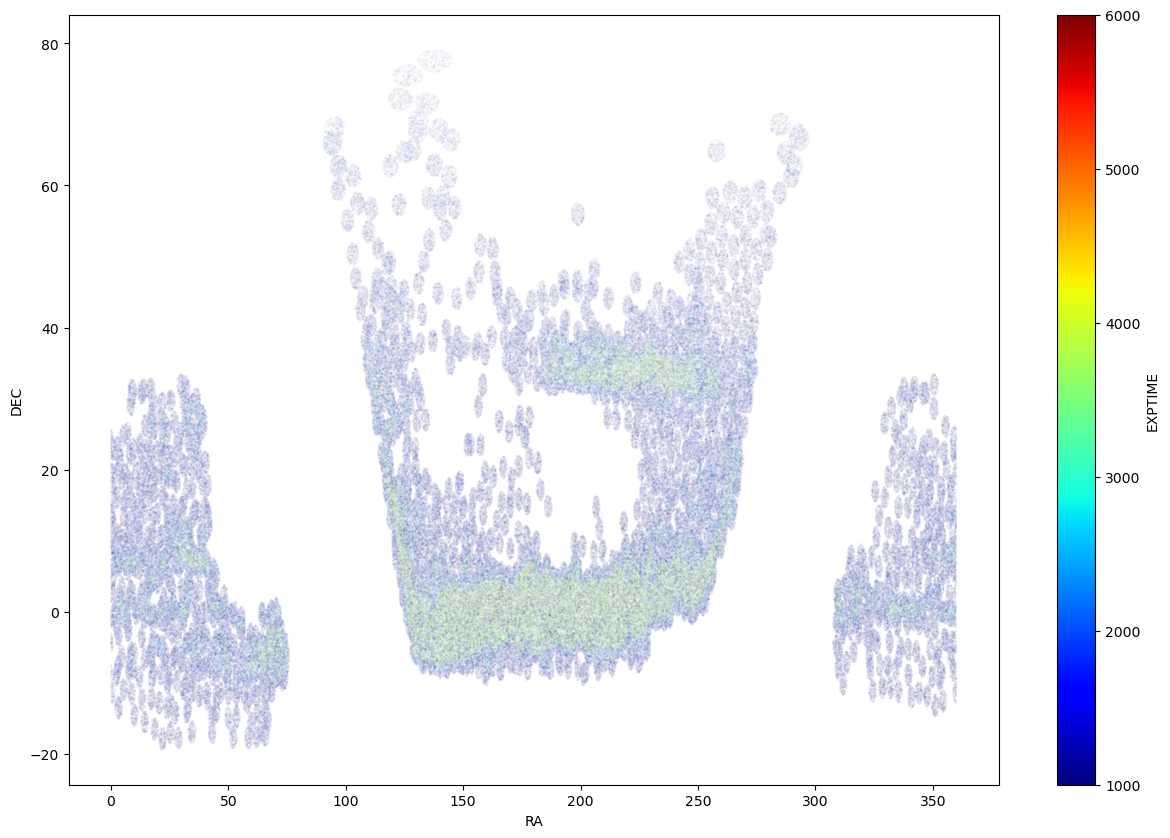

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(survey.mockcatalog['RA'],survey.mockcatalog['DEC'],c=survey.mockcatalog['EXPTIME'],s=0.0001,cmap='jet')
plt.colorbar(label='EXPTIME')
plt.xlabel('RA')
plt.ylabel('DEC')